# DATA/MC comparison with ACPT with Awkard.JaggedArray

In [1]:
%load_ext autoreload
%autoreload 2

import math
from itertools import product
from copy import deepcopy
import uproot
import awkward
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import binned_statistic

import matplotlib
from matplotlib.colors import LogNorm

matplotlib.rcParams.update({'font.size': 12})

from calo_likelihood import caloLikelihood
from helpers import *
from loaders import *

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [5]:
today = '19_11_07'

In [6]:
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/acpt_studies_calo
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/acpt_studies_calo/datamc
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/acpt_studies_calo/calibration
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/acpt_studies_calo/datamc_cali

In [7]:
save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/acpt_studies_calo/'
save_folder_datamc = save_folder+'datamc/'
save_folder_calibration = save_folder+'calibration'
save_folder_datamc_cali = save_folder+'datamc_cali/'

In [8]:
branches = [
    'run',
    'sub',
    'evt',
    
#     'slpdg',
#     'nslice',
    
    'backtracked_pdg',
    'backtracked_e',
    'backtracked_purity',
    'backtracked_completeness',
    'backtracked_overlay_purity',
#     'backtracked_px',
#     'backtracked_py',
#     'backtracked_pz',
#     'backtracked_start_x',
#     'backtracked_start_y',
#     'backtracked_start_z',
#     'backtracked_start_t',
#     'backtracked_start_U',
#     'backtracked_start_V',
#     'backtracked_start_Y',
#     'backtracked_sce_start_x',
#     'backtracked_sce_start_y',
#     'backtracked_sce_start_z',
#     'backtracked_sce_start_U',
#     'backtracked_sce_start_V',
#     'backtracked_sce_start_Y',

#     'true_nu_vtx_x',
#     'true_nu_vtx_y',
#     'true_nu_vtx_z', 
#     'true_nu_vtx_sce_x',
#     'true_nu_vtx_sce_y',
#     'true_nu_vtx_sce_z',
    
#     'reco_nu_vtx_x',
#     'reco_nu_vtx_y',
#     'reco_nu_vtx_z', 
#     'reco_nu_vtx_sce_x',
#     'reco_nu_vtx_sce_y',
#     'reco_nu_vtx_sce_z',
    
#     'nplanehits_U',
#     'nplanehits_V',
#     'nplanehits_Y',
#     'trk_score',

    'trk_start_x',
    'trk_start_y',
    'trk_start_z',

    'trk_theta',
    'trk_phi',

    'trk_dir_x',
    'trk_dir_y',
    'trk_dir_z',

    'trk_end_x',
    'trk_end_y',
    'trk_end_z',

    'trk_len',
    
#     'dqdx_u',
#     'dqdx_v',
#     'dqdx_y',

    'dedx_u',
    'dedx_v',
    'dedx_y',

    'rr_u',
    'rr_v',
    'rr_y',

    'pitch_u',
    'pitch_v',
    'pitch_y',
    
#     'x_u',
#     'x_v',
#     'x_y',
    
#     'y_u',
#     'y_v',
#     'y_y',
    
#     'z_u',
#     'z_v',
#     'z_y',
    
    'dir_x_u',
    'dir_x_v',
    'dir_x_y',
    
    'dir_y_u',
    'dir_y_v',
    'dir_y_y',
    
    'dir_z_u',
    'dir_z_v',
    'dir_z_y',
]

In [9]:
# file_folder = '~/Desktop/MicroBooNE/calorimetry_likelihood/v1_david/'

# filenames = {
#     'mc': file_folder + 'mc.root',
#     'data': file_folder + 'data.root',
# }

# split_factor = 0.05
# split_factor2 = 0.1

# folder = "nuselection"
# tree = "CalorimetryAnalyzer"

# root_file_mc = uproot.open(filenames['mc'])[folder][tree]
# entry_split_mc = int(len(root_file_mc) * split_factor)
# entry_split2_mc = int(len(root_file_mc) * split_factor2)
# array_mc_train = root_file_mc.arrays(branches, namedecode="utf-8", entrystop=entry_split_mc)
# array_mc_test = root_file_mc.arrays(branches, namedecode="utf-8", entrystart=entry_split_mc, entrystop=entry_split2_mc)

# root_file_data = uproot.open(filenames['data'])[folder][tree]
# entry_split2_data = int(len(root_file_data) * split_factor2)
# entry_split_data = int(len(root_file_data) * split_factor)
# array_data_train = root_file_data.arrays(branches, namedecode="utf-8", entrystop=entry_split_data)
# array_data_test = root_file_data.arrays(branches, namedecode="utf-8", entrystart=entry_split_data, entrystop=entry_split2_data)

In [10]:
file_folder = '~/Desktop/MicroBooNE/calorimetry_likelihood/v1_david/'

filenames = {
    'mc': file_folder + 'mc.root',
    'data': file_folder + 'data.root',
}

split_factor = 0.45

folder = "nuselection"
tree = "CalorimetryAnalyzer"

root_file_mc = uproot.open(filenames['mc'])[folder][tree]
entry_split_mc = int(len(root_file_mc) * split_factor)
array_mc_train = root_file_mc.arrays(branches, namedecode="utf-8", entrystop=entry_split_mc)
array_mc_test = root_file_mc.arrays(branches, namedecode="utf-8", entrystart=entry_split_mc)

root_file_data = uproot.open(filenames['data'])[folder][tree]
entry_split_data = int(len(root_file_data) * split_factor)
array_data_train = root_file_data.arrays(branches, namedecode="utf-8", entrystop=entry_split_data)
array_data_test = root_file_data.arrays(branches, namedecode="utf-8", entrystart=entry_split_data)

In [32]:
for array in [array_mc_train, array_mc_test, array_data_train, array_data_test]:
    abs_pitch(array)
    clip_rr(array)
    for i, plane in enumerate(['_u', '_v', '_y']):
        polar_angles(array, 'dir_x'+plane, 'dir_y'+plane, 'dir_z'+plane, i)
    dir_pitch(array)

In [12]:
def selection_base(array):
    mask = (array['trk_len'] > 0) & (array['trk_dir_y']<=0)
    return mask

def selection_mask_old(array):
    mask = selection_base(array)
    for plane in ['_u', '_v', '_y']:
        for direction in ['_x', '_y', '_z']:
            mask = mask & (  (np.isnan(array['dir'+direction+plane]) == False).all() )
    mask = mask & (array['trk_dir_y']<=0)
    return mask

def selection_mask(array):
    mask = selection_base(array)
    for plane in ['_u', '_v', '_y']:
        unit_v = np.sqrt(array['dir_z'+plane]**2 + array['dir_x'+plane]**2 + array['dir_y'+plane]**2)
        mask = mask &\
              (unit_v > 0.999).all() &\
              (unit_v < 1.001).all() &\
              (np.abs(array['dir_x'+plane]) != 1).all() &\
              (np.abs(array['dir_y'+plane]) != 1).all() &\
              (np.abs(array['dir_z'+plane]) != 1).all()
    return mask

def selection_efficiency(array):
    base_mask = selection_base(array)
    array_len = len(base_mask)
    print("base selection eff = {:.3f}".format(base_mask.sum()/array_len))
    
    sel_mask = selection_mask(array)
    print("complete selection eff = {:.3f}".format(sel_mask.sum()/array_len))

In [13]:
selection_efficiency(array_mc_train)

base selection eff = 0.999


/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in less
  result = getattr(ufunc, method)(*inputs, **kwargs)


complete selection eff = 0.851


In [14]:
selection_efficiency(array_data_train)

base selection eff = 0.998
complete selection eff = 0.858


In [15]:
muon_train = (abs(array_mc_train['backtracked_pdg']) == 13) & selection_mask(array_mc_train)
muon_test = (abs(array_mc_test['backtracked_pdg']) == 13) & selection_mask(array_mc_test)
data_train_mask = selection_mask(array_data_train)
data_test_mask = selection_mask(array_data_test)

In [17]:
# parameters = [['abs_pitch_u'], ['abs_pitch_v'], ['abs_pitch_y']]
# parameters_legend_names = [['pitch-U'], ['pitch-V'], ['pitch-Y']]
# parameters_bin_edges = [[0.3, 0.4, 0.5, 0.8, 1, 1.25, 1.5, 2, 2.5, 3, 30, 100000]]
# dedx_vars = ['dedx_u', 'dedx_v', 'dedx_y']
# dedx_bins = np.linspace(0, 10, 100)
# pdgcode_var = 'backtracked_pdg'

In [18]:
# parameters = [['abs_theta_y_u', 'abs_theta_xz_u'],
#               ['abs_theta_y_v', 'abs_theta_xz_v'],
#               ['abs_theta_y_y', 'abs_theta_xz_y'],]
# parameters_legend_names = [[r'$\theta_{y}$ - U', r'$\theta_{xz}$ - U'],
#                            [r'$\theta_{y}$ - V', r'$\theta_{xz}$ - V'],
#                            [r'$\theta_{y}$ - Y', r'$\theta_{xz}$ - Y'],]
# parameters_bin_edges = [np.append(np.linspace(-0.001, np.pi/2, 9), np.inf), np.append(np.linspace(-0.001, np.pi/2, 10), np.inf)]
# dedx_vars = ['dedx_u', 'dedx_v', 'dedx_y']
# dedx_bins = np.append(np.linspace(0, 10, 100), np.inf)
# pdgcode_var = 'backtracked_pdg'

In [16]:
parameters = [['abs_theta_x_u', 'abs_theta_yz_u'],
              ['abs_theta_x_v', 'abs_theta_yz_v'],
              ['abs_theta_x_y', 'abs_theta_yz_y'],]
parameters_legend_names = [[r'$\theta_{x}$ - U', r'$\theta_{yz}$ - U'],
                           [r'$\theta_{x}$ - V', r'$\theta_{yz}$ - V'],
                           [r'$\theta_{x}$ - Y', r'$\theta_{yz}$ - Y'],]
parameters_bin_edges = [np.linspace(0, np.pi/2, 7), np.linspace(0, np.pi/2, 9)]
dedx_vars = ['dedx_u', 'dedx_v', 'dedx_y']
dedx_bins = np.linspace(0, 10, 100)
pdgcode_var = 'backtracked_pdg'

In [23]:
parameters = [['abs_theta_y_u', 'abs_theta_xz_u'],
              ['abs_theta_y_v', 'abs_theta_xz_v'],
              ['abs_theta_y_y', 'abs_theta_xz_y'],]
parameters_legend_names = [[r'$\theta_{y}$ - U', r'$\theta_{xz}$ - U'],
                           [r'$\theta_{y}$ - V', r'$\theta_{xz}$ - V'],
                           [r'$\theta_{y}$ - Y', r'$\theta_{xz}$ - Y'],]
parameters_bin_edges = [np.linspace(0, np.pi/2, 7), np.linspace(0, np.pi/2, 9)]
dedx_vars = ['dedx_u', 'dedx_v', 'dedx_y']
dedx_bins = np.linspace(0, 10, 100)
pdgcode_var = 'backtracked_pdg'

In [33]:
parameters = [['abs_theta_z_u', 'abs_theta_yx_u'],
              ['abs_theta_z_v', 'abs_theta_yx_v'],
              ['abs_theta_z_y', 'abs_theta_yx_y'],]
parameters_legend_names = [[r'$\theta$ - U', r'$\phi$ - U'],
                           [r'$\theta$ - V', r'$\phi$ - V'],
                           [r'$\theta$ - Y', r'$\phi$ - Y'],]
parameters_bin_edges = [np.linspace(0, np.pi/2, 7), np.linspace(0, np.pi/2, 9)]
dedx_vars = ['dedx_u', 'dedx_v', 'dedx_y']
dedx_bins = np.linspace(0, 10, 100)
pdgcode_var = 'backtracked_pdg'

In [34]:
caloLike_calibration = caloLikelihood(array_mc_train, quality_mask=muon_train)
caloLike_calibration.load_data(array_data_train, overall_mask=data_train_mask)

caloLike_test = caloLikelihood(array_mc_test, quality_mask=muon_test)
caloLike_test.load_data(array_data_test, overall_mask=data_test_mask)

In [35]:
caloLike_calibration.setPdgCodeVar(pdgcode_var)
caloLike_test.setPdgCodeVar(pdgcode_var)

for i in [0, 1, 2]:
    caloLike_calibration.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], dedx_bins, parameters_legend_names[i])
    
    caloLike_calibration.buildLookUpTableMC(i, 13)
    caloLike_calibration.buildLookUpTableData(i, 'default')
    
    caloLike_test.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], dedx_bins, parameters_legend_names[i])

In [ ]:
caloLike_calibration.plotLookUpDedxDataMC(plane_num=2,
                        pdg_code=13, 
                        data_selection='default', 
                        parameters_value=[0.8, 0.7],
                        add_to_title='Calibration sample')

In [36]:
for plane_num in [0, 1, 2]:
    bin_centers = product(*caloLike_calibration.parameters_bin_centers[plane_num])
    for bin_center in bin_centers:
        caloLike_calibration.plotLookUpDedxDataMC(plane_num=plane_num,
                        pdg_code=13, 
                        data_selection='default', 
                        parameters_value=bin_center,
                        add_to_title='Calibration sample')
        plt.savefig(save_folder_datamc+'plane_{}_theta_{:.2f}_phi_{:.2f}.png'.format(plane_num, bin_center[0], bin_center[1]), dpi=200)
        plt.close()

In [26]:
plane_num = 2
bin_centers = product(*caloLike_calibration.parameters_bin_centers[plane_num])
for bin_center in bin_centers:
    caloLike_calibration.plotLookUpDedxDataMC(plane_num=plane_num,
                    pdg_code=13, 
                    data_selection='default', 
                    parameters_value=bin_center,
                    add_to_title='Calibration sample')
    plt.savefig(save_folder_datamc+'plane_{}_theta_y_{:.2f}_theta_xz_{:.2f}.png'.format(plane_num, bin_center[0], bin_center[1]), dpi=200)
    plt.tight_layout()
    plt.close()

/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/calorimetry_likelihood/calo_likelihood.py:452: RuntimeWarning: divide by zero encountered in true_divide
  bin_contents_ratio = bin_contents_data / bin_contents_mc


## Calibration

In [23]:
def scale_calibration(mu, dedx, *parameter_values):
    return mu * dedx

In [24]:
caloLike_calibration.setCalibrationFunction(calibration_function=scale_calibration, 
                                vectorize=True, 
                                excluded=None)

caloLike_test.setCalibrationFunction(calibration_function=scale_calibration, 
                                vectorize=True, 
                                excluded=None)

/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(ufunc, method)(*inputs, **kwargs)


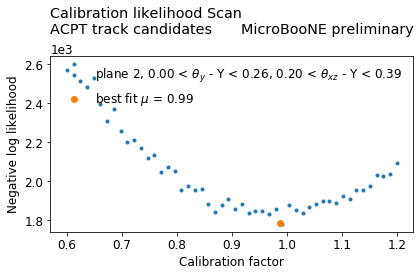

In [25]:
caloLike_calibration.calibrationLikelihoodProfile(mu_binning=[0.6, 1.2, 50], 
                                      plane_num=2, 
                                      parameters_value=[0.1, 0.2], 
                                      pdg_code=13, 
                                      data_selection='default', 
                                      binned_data=False, 
                                      plot=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
# plt.savefig(save_folder+'plane_2_pitch_0.75.png', dpi=250)

In [23]:
# mu_scan_binning = [0.8, 1.3, 50]
# for plane in [0, 1, 2]:
#     caloLike_calibration.buildCalibrationTable(mu_scan_binning=mu_scan_binning, 
#                           plane_num=plane, 
#                           pdg_code=13, 
#                           data_selection='default', 
#                           plot_folder=save_folder_calibration)

In [26]:
mu_scan_binning = [0.6, 1.2, 50]
caloLike_calibration.buildCalibrationTable(mu_scan_binning=mu_scan_binning, 
                          plane_num=2, 
                          pdg_code=13, 
                          data_selection='default', 
                          plot_folder=save_folder_calibration)

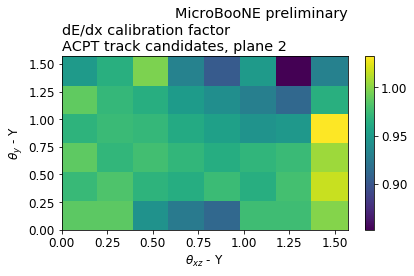

In [94]:
caloLike_calibration.plotCalibration2d(2)
plt.savefig(save_folder_datamc_cali+'calibration_table_plane2.png', dpi=200)


In [ ]:
# for i in [0, 1, 2]:
#     caloLike_test.buildLookupTableMC(i, 13, cali=True)
#     caloLike_test.buildLookupTableData(i, 'default')

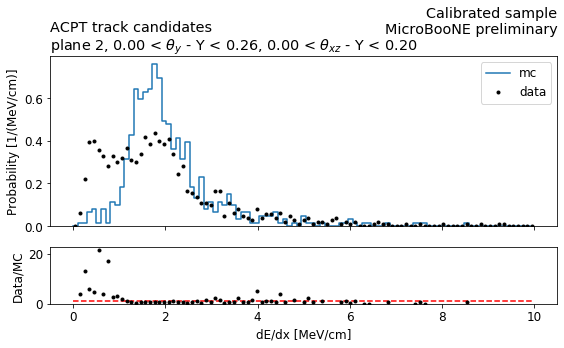

In [67]:
plane_num = 2
caloLike_test.calibration_table = caloLike_calibration.calibration_table
caloLike_test.buildLookUpTableMC(plane_num, 13, cali=True)
caloLike_test.buildLookUpTableData(plane_num, 'default')

bin_centers = product(*caloLike_test.parameters_bin_centers[plane_num])
for bin_center in bin_centers:
    caloLike_test.plotLookUpDedxDataMC(plane_num=plane_num,
                    pdg_code=13, 
                    data_selection='default', 
                    parameters_value=bin_center,
                    add_to_title='Calibrated sample')
    plt.savefig(save_folder_datamc_cali+'plane_{}_theta_y_{:.2f}_theta_xz_{:.2f}.png'.format(plane_num, bin_center[0], bin_center[1]), dpi=200)
    plt.tight_layout()
    plt.close()

In [60]:
caloLike_test2 = caloLikelihood(None)
caloLike_test2.setPdgCodeVar(pdgcode_var)

for i in [0, 1, 2]:
    caloLike_test2.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], dedx_bins, parameters_legend_names[i])
    
caloLike_test.buildLookUpTableMC(2, 13, cali=False)
caloLike_test2.lookup_tables = deepcopy(caloLike_test.lookup_tables)
caloLike_test.calibration_table = caloLike_calibration.calibration_table
caloLike_test.buildLookUpTableMC(2, 13, cali=True)

## Plot pdf before and after

In [92]:
plane_num = 2
bins = 101

bin_centers = product(*caloLike_test.parameters_bin_centers[plane_num])
for bin_center in bin_centers:

    fig, ax = plt.subplots(ncols=1,
                                   nrows=2,
                                   figsize=(8, 5),
                                   sharex='col',
                                   gridspec_kw={'height_ratios': [3, 1]})

    plt.sca(ax[0])

    bin_contents_mc = caloLike_test2.plotLookUpDedxMC(plane_num=2,
                            pdg_code=13, 
                            parameters_value=bin_center, 
                            label='mc')

    bin_contents_mc_cali = caloLike_test.plotLookUpDedxMCfancy(plane_num=2,
                            pdg_code=13, 
                            parameters_value=bin_center,
                            add_to_title='Test sample', 
                            title_left='ACPT track candidates\n', 
                            label='mc cali')

    bin_contents_data = caloLike_test.plotLookUpDedxData(plane_num=2,
                            data_selection='default', 
                            parameters_value=bin_center)

    dedx_bins_centers = caloLike_test.dedx_bins_centers[plane_num]
    dedx_bins_edges = caloLike_test.dedx_bin_edges[plane_num]
    plt.legend()
    plt.xlabel('')
    plt.xlim(0, 5)
    plt.sca(ax[1])
    plt.plot(dedx_bins_centers, bin_contents_data/bin_contents_mc, '.', label='mc')
    plt.plot(dedx_bins_centers, bin_contents_data/bin_contents_mc_cali, '.', label='mc calibrated')
    plt.plot([dedx_bins_edges[0], dedx_bins_edges[-1]], [1, 1], '--k', alpha=0.3)
    plt.ylim(0.5, 2)
    plt.xlabel('dE/dx [MeV/cm]')
    plt.ylabel('Data/MC')
    plt.savefig(save_folder_datamc_cali +'plane_{}_theta_y_{:.2f}_theta_xz_{:.2f}.png'.format(plane_num, bin_center[0], bin_center[1]), dpi=200)
    plt.tight_layout()
    plt.close()

/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


## Compute likelihood and plot

In [82]:
caloLike_calibration.buildLookUpTableMC(i, 13, cali=True)

In [83]:
plane_num = 2
array = caloLike_test.array
array['like_13_{}'.format(i)] = caloLike_calibration.likelihoodWholeDataset(array, 
                                  plane_num=plane_num, 
                                  pdg_code=13,
                                  cali=False                                          
                                  )
array['like_13_sum_{}'.format(plane_num)] = array['like_13_{}'.format(plane_num)].sum()
array['like_13_sum_atan_{}'.format(plane_num)] = 2/np.pi*np.arctan(array['like_13_sum_{}'.format(plane_num)])

array['like_13_{}_cali'.format(plane_num)] = caloLike_calibration.likelihoodWholeDataset(array, 
                                  plane_num=plane_num, 
                                  pdg_code=13,
                                  cali=True                                     
                                  )
array['like_13_sum_{}_cali'.format(plane_num)] = array['like_13_{}_cali'.format(plane_num)].sum()
array['like_13_sum_atan_{}_cali'.format(plane_num)] = 2/np.pi*np.arctan(array['like_13_sum_{}_cali'.format(plane_num)])

array = caloLike_test.array_data
array['like_13_{}'.format(i)] = caloLike_calibration.likelihoodWholeDataset(array, 
                                  plane_num=plane_num, 
                                  pdg_code=13,
                                  cali=False                                          
                                  )
array['like_13_sum_{}'.format(plane_num)] = array['like_13_{}'.format(plane_num)].sum()
array['like_13_sum_atan_{}'.format(plane_num)] = 2/np.pi*np.arctan(array['like_13_sum_{}'.format(plane_num)])

In [84]:
parameters_bin_edges

[array([0.        , 0.26179939, 0.52359878, 0.78539816, 1.04719755,
        1.30899694, 1.57079633]),
 array([0.        , 0.19634954, 0.39269908, 0.58904862, 0.78539816,
        0.9817477 , 1.17809725, 1.37444679, 1.57079633])]

/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'Data/MC')

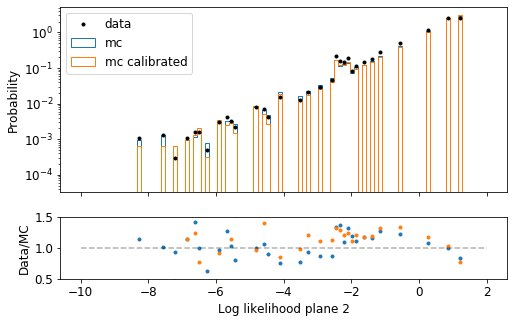

In [94]:
plane_num = 2
bins = 101
range = [-10, 2]
var_name = 'like_13_{}'.format(plane_num)

def mask_theta_phi(array):
    return (array['abs_theta_y_y'] > 1.04719755) &\
           (array['abs_theta_y_y'] < 1.30899694) &\
           (array['abs_theta_xz_y'] > 1.37444679) &\
           (array['abs_theta_xz_y'] < 1.57079633)
function_mask = mask_theta_phi

fig, ax = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(8, 5),
                               sharex='col',
                               gridspec_kw={'height_ratios': [3, 1]})

plt.sca(ax[0])
bin_contents_mc = caloLike_test.plotVariableMC(var_name, 
                                      bins, 
                                      range, 
                                      function_mask, 
                                      quality_mask=True, 
                                      label='mc', 
                                      histtype='step',
                                      log=True)
bin_contents_mc_cali = caloLike_test.plotVariableMC(var_name+'_cali', 
                                      bins, 
                                      range, 
                                      function_mask, 
                                      quality_mask=True, 
                                      label='mc calibrated', 
                                      histtype='step')
bin_centers, bin_edges, bin_contents_data = caloLike_test.plotVariableData(var_name, 
                                          bins, 
                                          range, 
                                          function_mask, 
                                          data_selection='default', 
                                          label='data')
plt.legend()
plt.sca(ax[1])
plt.plot(bin_centers, bin_contents_data/bin_contents_mc, '.', label='mc')
plt.plot(bin_centers, bin_contents_data/bin_contents_mc_cali, '.', label='mc calibrated')
plt.plot([range[0], range[-1]], [1, 1], '--k', alpha=0.3)
plt.ylim(0.5, 1.5)
plt.xlabel('Log likelihood plane 2')
plt.ylabel('Data/MC')

## Little study horizontal and vertical tracks

In [ ]:
vertical = array_mc_train['dedx_y'][muon_train & 
                                    (abs(array_mc_train['trk_dir_y'])> 0.9) & 
                                    (abs(array_mc_train['trk_dir_x']) < 0.05)].flatten()
horizontal = array_mc_train['dedx_y'][muon_train & 
                                      (abs(array_mc_train['trk_dir_x'])> 0.9)].flatten()

In [ ]:
binning = [100, 0, 5]
plt.hist(vertical, 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='|direction y| > 0.9 & |direction x| < 0.05',
        density=True);
plt.hist(horizontal, 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='|direction x| > 0.9',
        density=True);
plt.legend()
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Density [(MeV/cm)$^{-1}$]')
plt.title('ACPT simulated\ndE/dx Y-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.savefig(save_folder+'dedx_vs_directions.png', dpi=250)

In [ ]:
vertical_all_x = array_mc_train['dedx_y'][muon_train & 
                                    (abs(array_mc_train['trk_dir_y'])> 0.9)]
x_values = array_mc_train['trk_dir_x'][muon_train & 
                                    (abs(array_mc_train['trk_dir_y'])> 0.9)]

x_values_expanded = x_values * (vertical_all_x == vertical_all_x)

In [ ]:
plt.hist2d(x_values_expanded.flatten(), 
           vertical_all_x.flatten(),
           range=((-0.45, 0.45), (0, 4)),
           bins=(50, 50), 
           norm=LogNorm())
plt.colorbar()

plt.xlabel('Direction X')
plt.ylabel('dE/dx [MeV/cm]')
plt.title('ACPT simulated, |direction-Y| > 0.9\ndE/dx Y-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.tight_layout()
plt.savefig(save_folder+'dedx_vs_x_direction.png', dpi=250)

## Little study for the cutoff at low dE/dx

In [ ]:
binning = [100, 0, 1]
plt.hist(array_mc_train['dedx_y'][muon_train].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='mc',
        density=True);
plt.hist(array_data_train['dedx_y'][data_train_mask].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='data',
        density=True);
plt.legend()
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Density [(MeV/cm)$^{-1}$]')
plt.title('ACPT simulated\ndE/dx Y-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.savefig(save_folder+'low_dedx_cutoff_yplane.png', dpi=250)

In [ ]:
binning = [100, 0, 1]
plt.hist(array_mc_train['dedx_u'][muon_train].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='mc',
        density=True);
plt.hist(array_data_train['dedx_u'][data_train_mask].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='data',
        density=True);
plt.legend()
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Density [(MeV/cm)$^{-1}$]')
plt.title('ACPT simulated\ndE/dx U-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.savefig(save_folder+'low_dedx_cutoff_uplane.png', dpi=250)

In [ ]:
binning = [100, 0, 1]
plt.hist(array_mc_train['dedx_v'][muon_train].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='mc',
        density=True);
plt.hist(array_data_train['dedx_v'][data_train_mask].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='data',
        density=True);
plt.legend()
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Density [(MeV/cm)$^{-1}$]')
plt.title('ACPT simulated\ndE/dx V-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.savefig(save_folder+'low_dedx_cutoff_vplane.png', dpi=250)

# Study of the angles \theta_xz and \theta_yz

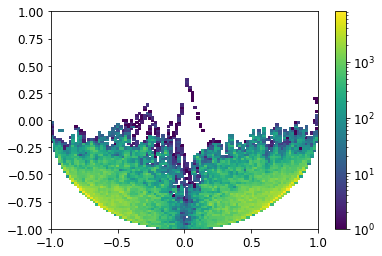

In [15]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

x = caloLike_calibration.array['dir_x_y'][caloLike_calibration.quality_mask].flatten()
y = caloLike_calibration.array['dir_y_y'][caloLike_calibration.quality_mask].flatten()

plt.hist2d(x, y, range=[[-1, 1], [-1, 1]], bins=[101, 101], norm=LogNorm());
plt.colorbar()

In [24]:
caloLike_calibration.array['dir_y_y']

<JaggedArray [[0.0 -0.74133277 0.0 ... 0.0 0.0 0.0] [-0.5945011 -0.59927386 -0.5993049 ... -0.64937395 -0.6481412 -0.6484071] [-0.52000284 -0.52000284 -0.52000284 ... -0.52000284 -0.52000284 -0.52000284] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [-0.25089422 -0.25014514 -0.24979733 ... -0.36122605 -0.3610174 -0.36095187] [-0.61235225 -0.6123863 -0.6122133 ... -0.6709001 -0.671342 -0.6719527]] at 0x7fb8132c8e50>

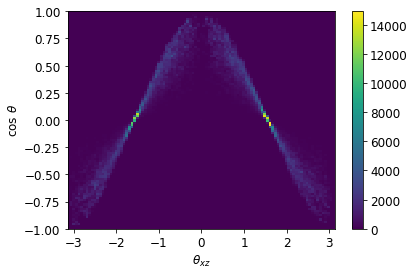

In [36]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

y = caloLike_calibration.array['dir_z_y'][caloLike_calibration.quality_mask].flatten()
x = caloLike_calibration.array['theta_xz_y'][caloLike_calibration.quality_mask].flatten()

plt.hist2d(x, y, range=[[-np.pi, np.pi], [-1, 1]], bins=[101, 101]);
plt.ylabel(r'cos $\theta$')
plt.xlabel(r'$\theta_{xz}$')
plt.colorbar()

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.9)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['theta_yz_y'][selection].flatten()

plt.hist2d(x, y, bins=[101, 101], range=[[-math.pi, math.pi], [-math.pi, math.pi]], norm=LogNorm());
plt.xlabel('theta_xz')
plt.ylabel('theta_yz')
plt.colorbar()

In [ ]:
x = caloLike_calibration.array['abs_theta_xz_y'][caloLike_calibration.quality_mask].flatten()
y = caloLike_calibration.array['abs_theta_yz_y'][caloLike_calibration.quality_mask].flatten()

plt.hist2d(x, y, bins=[100, 100], norm=LogNorm());
plt.colorbar()

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.9)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['theta_y_y'][selection].flatten()

plt.hist2d(x, y, bins=[101, 101], range=[[-math.pi, math.pi], [0, math.pi]], norm=LogNorm());
plt.xlabel('theta_xz')
plt.ylabel('theta_y')
plt.colorbar()

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.8)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['theta_yx_y'][selection].flatten()

plt.hist2d(x, y, bins=[101, 101], range=[[-math.pi, math.pi], [-math.pi, math.pi]], norm=LogNorm());
plt.xlabel('theta_xz')
plt.ylabel('theta_yx')
plt.colorbar()

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.8)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['theta_y_y'][selection].flatten()

plt.hist2d(x, y, bins=[101, 101], range=[[-math.pi, math.pi], [0, math.pi]], norm=LogNorm());
plt.xlabel('theta_xz_y')
plt.ylabel('theta_y_y')
plt.colorbar()
plt.savefig(save_folder + 'theta_y_y_vs_theta_xz_y.png', dpi=200)

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.8)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['abs_theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['abs_theta_y_y'][selection].flatten()

plt.hist2d(x, y, bins=[21, 21], range=[[0, math.pi/2], [0, math.pi/2]], norm=LogNorm());
plt.xlabel('abs_theta_xz_y')
plt.ylabel('abs_theta_y_y')
plt.colorbar()
# plt.savefig(save_folder + 'abs_theta_y_y_vs_abs_theta_xz_y.png', dpi=200)

In [ ]:
array_used = caloLike_test.array
qual_mask = caloLike_test.quality_mask

In [ ]:
mask_thetay_pi2 = array_used['abs_theta_y_y'] == math.pi/2

In [ ]:
array_used['trk_start_z'][qual_mask & mask_diry_1.any()].flatten()

In [ ]:
array_used['trk_end_z'][qual_mask & mask_diry_1.any()].flatten()

In [ ]:
array_used['z_y'][qual_mask & mask_diry_1.any()].flatten()

In [ ]:
array_used['dir_x_y'][qual_mask & mask_diry_1].flatten()

In [ ]:
array_used['dir_y_y'][qual_mask & mask_thetay_pi2].flatten()

In [ ]:
array_used['dir_z_y'][qual_mask & mask_thetay_pi2].flatten()

In [ ]:
array_used['pitch_y'][qual_mask & mask_thetay_pi2].flatten()

In [ ]:
mask_diry_1 = np.abs(array_used['dir_y_y']) == 1

In [ ]:
array_used['abs_theta_xz_y'][qual_mask & mask_diry_1.any()].flatten()

In [ ]:
array = array_mc_train
mask = selection_mask(array)

In [ ]:
array['evt'][~mask]

In [ ]:
array['run'][~mask]

In [ ]:
array['sub'][~mask]

In [ ]:
array['dir_x_y'][~mask]

In [ ]:
array['dir_y_y'][~mask]

In [ ]:
array['dir_z_y'][~mask]

In [ ]:
array['z_y'][~mask]

In [ ]:
array['trk_start_z'][~mask]

In [ ]:
array['trk_end_z'][~mask]

In [ ]:
aux = (np.abs(array['dir_pitch_y']) - array['pitch_y'])[~mask].flatten()
out = np.arctan(aux)
plt.hist(out, bins=100, log=True);
plt.xlabel('arctan(Pitch from direction - Pitch from calorimetry)')
plt.title('Events with bad quality')

In [ ]:
aux = (np.abs(array['dir_pitch_y']) - array['pitch_y'])[mask].flatten()
out = np.arctan(aux)
plt.hist(out, bins=100, log=True);
plt.xlabel('arctan(Pitch from direction - Pitch from calorimetry)')
plt.title('Events with good quality')

# Random checks

In [ ]:
np.isnan(caloLike_calibration.array_mc['dir_x_y']).any()

In [ ]:
caloLike_calibration.array['dedx_y'][-2]

In [ ]:
caloLike_calibration.array['rr_y'][-2]

In [ ]:
caloLike_calibration.array['pitch_y'][-2]

In [ ]:
ev_num = -2
print('evt', caloLike_calibration.array['evt'][ev_num])
print('run', caloLike_calibration.array['run'][ev_num])
print('sub', caloLike_calibration.array['sub'][ev_num])
print()
print('trk_start_x', caloLike_calibration.array['trk_start_x'][ev_num])
print('trk_start_y', caloLike_calibration.array['trk_start_y'][ev_num])
print('trk_start_z', caloLike_calibration.array['trk_start_z'][ev_num])
print()
print('trk_end_x', caloLike_calibration.array['trk_end_x'][ev_num])
print('trk_end_y', caloLike_calibration.array['trk_end_y'][ev_num])
print('trk_end_z', caloLike_calibration.array['trk_end_z'][ev_num])
print()
print()
print('x_y', caloLike_calibration.array['x_y'][ev_num])
print('y_y', caloLike_calibration.array['y_y'][ev_num])
print('z_y', caloLike_calibration.array['z_y'][ev_num])
print()
print()
print('x_u', caloLike_calibration.array['x_u'][ev_num])
print('y_u', caloLike_calibration.array['y_u'][ev_num])
print('z_u', caloLike_calibration.array['z_u'][ev_num])
print()
print()
print('x_v', caloLike_calibration.array['x_v'][ev_num])
print('y_v', caloLike_calibration.array['y_v'][ev_num])
print('z_v', caloLike_calibration.array['z_v'][ev_num])
print()
print()
print('dir_x_y', caloLike_calibration.array['dir_x_y'][ev_num])
print('dir_y_y', caloLike_calibration.array['dir_y_y'][ev_num])
print('dir_z_y', caloLike_calibration.array['dir_z_y'][ev_num])
print()
print()
print('dir_x_u', caloLike_calibration.array['dir_x_u'][ev_num])
print('dir_y_u', caloLike_calibration.array['dir_y_u'][ev_num])
print('dir_z_u', caloLike_calibration.array['dir_z_u'][ev_num])
print()
print()
print('dir_x_v', caloLike_calibration.array['dir_x_v'][ev_num])
print('dir_y_v', caloLike_calibration.array['dir_y_v'][ev_num])
print('dir_z_v', caloLike_calibration.array['dir_z_v'][ev_num])